In [1]:
from bunkatopics import BunkaTopics
import pandas as pd


data = pd.read_csv("data/imdb.csv", index_col=[0])
data = data.sample(3000, random_state=42)


model = BunkaTopics(
    data,  # dataFrame
    text_var="description",  # Text Columns
    index_var="imdb",  # Index Column (Mandatory)
    extract_terms=True,  # extract Terms ?
    terms_embeddings=False,  # extract terms Embeddings?
    docs_embeddings=False,  # extract Docs Embeddings?
    embeddings_model="distiluse-base-multilingual-cased-v1",  # Chose an embeddings Model
    multiprocessing=True,  # Multiprocessing of Embeddings
    language="en",  # Chose between English "en" and French "fr"
    sample_size_terms=len(data),
    terms_limit=10000,  # Top Terms to Output
    terms_ents=True,  # Extract entities
    terms_ngrams=(1, 2),  # Chose Ngrams to extract
    terms_ncs=True,  # Extract Noun Chunks
    terms_include_pos=["NOUN", "PROPN", "ADJ"],  # Include Part-of-Speech
    terms_include_types=["PERSON", "ORG"],
)  # Include Entity Types

# Extract the topics


2022-06-25 10:32:05,634 - Extracting Terms...
2022-06-25 10:32:05,996 - loaded 'en_core_web_sm' spaCy language pipeline
100%|██████████████████████████████████████████████████████████████| 2990/2990 [00:20<00:00, 145.96it/s]


In [2]:
model.docs_embeddings = pd.read_csv('test/docs_embeddings.csv', index_col = [0])
model.docs_embeddings.columns = model.docs_embeddings.columns.astype(int)

In [5]:
topics = model.get_clusters(
    topic_number=15,  # Number of Topics
    top_terms_included=1000,  # Compute the specific terms from the top n terms
    top_terms=5,  # Most specific Terms to describe the topics
    term_type="lemma",  # Use "lemma" of "text"
    ngrams=[1, 2],
    clusterer = 'hdbscan'
)  # N-grams for Topic Representation


UMAP(random_state=42, verbose=True)
Sat Jun 25 10:33:04 2022 Construct fuzzy simplicial set
Sat Jun 25 10:33:04 2022 Finding Nearest Neighbors
Sat Jun 25 10:33:04 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:33:04 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:33:18 2022 Finished embedding


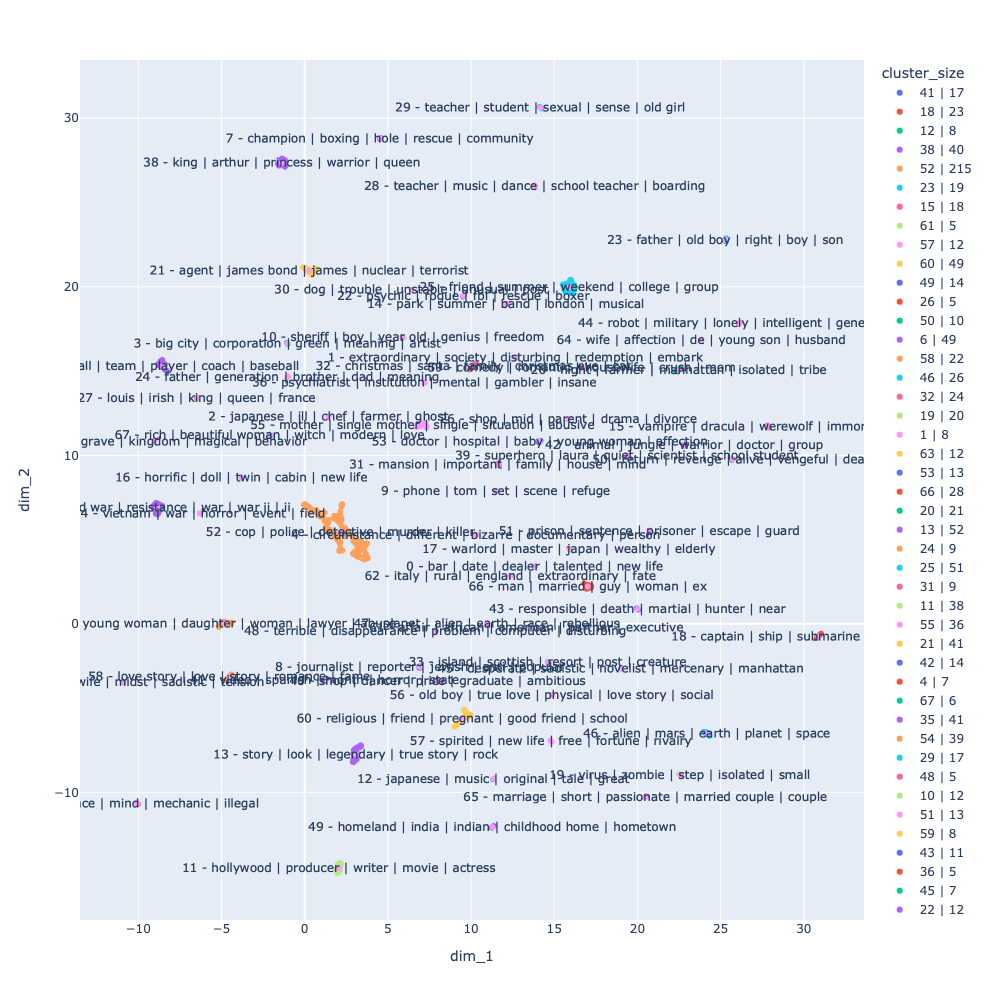

In [6]:
# Visualize the clusters. It is adviced to choose less that 5 terms - top_terms = 5 - to avoid overchanging the Figure

fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=True, density_plot=False)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:33:52 2022 Construct fuzzy simplicial set
Sat Jun 25 10:33:52 2022 Finding Nearest Neighbors
Sat Jun 25 10:33:52 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:33:52 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:33:55 2022 Finished embedding


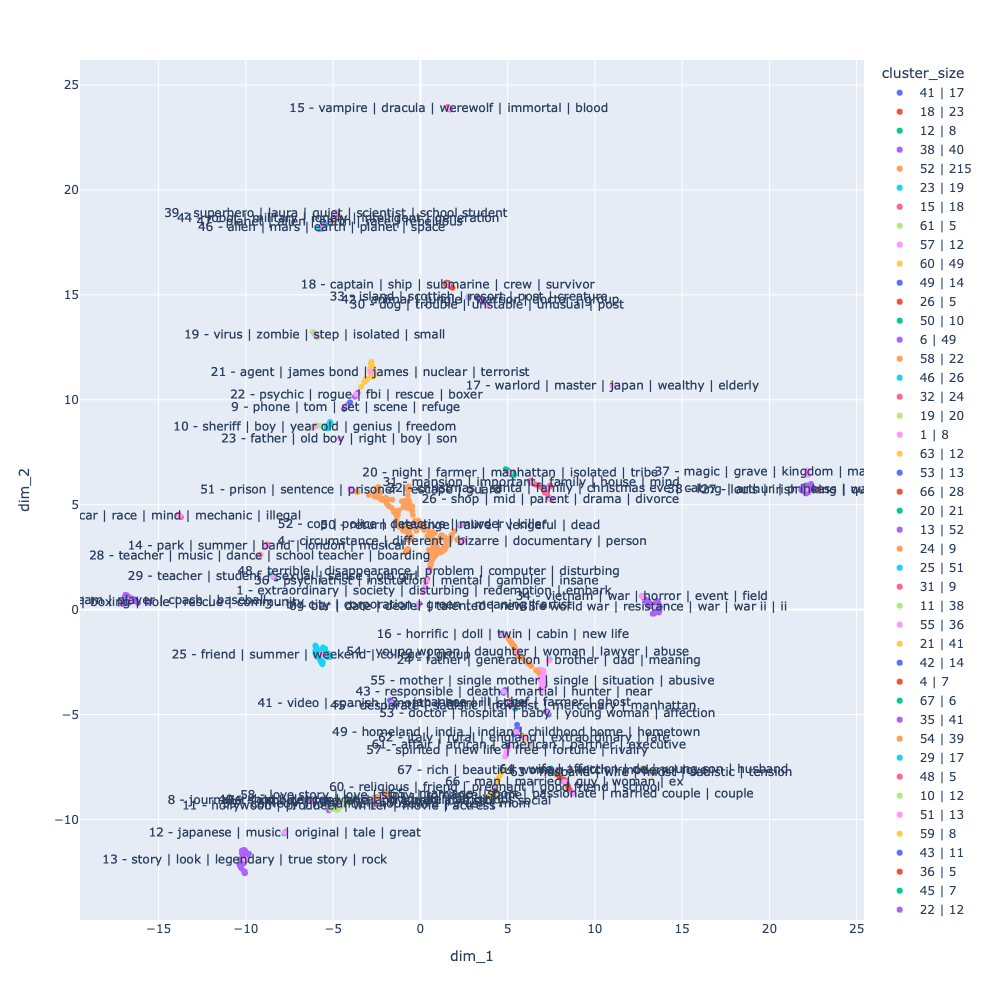

In [8]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=False, density_plot=False)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:33:21 2022 Construct fuzzy simplicial set
Sat Jun 25 10:33:22 2022 Finding Nearest Neighbors
Sat Jun 25 10:33:22 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:33:22 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:33:38 2022 Finished embedding


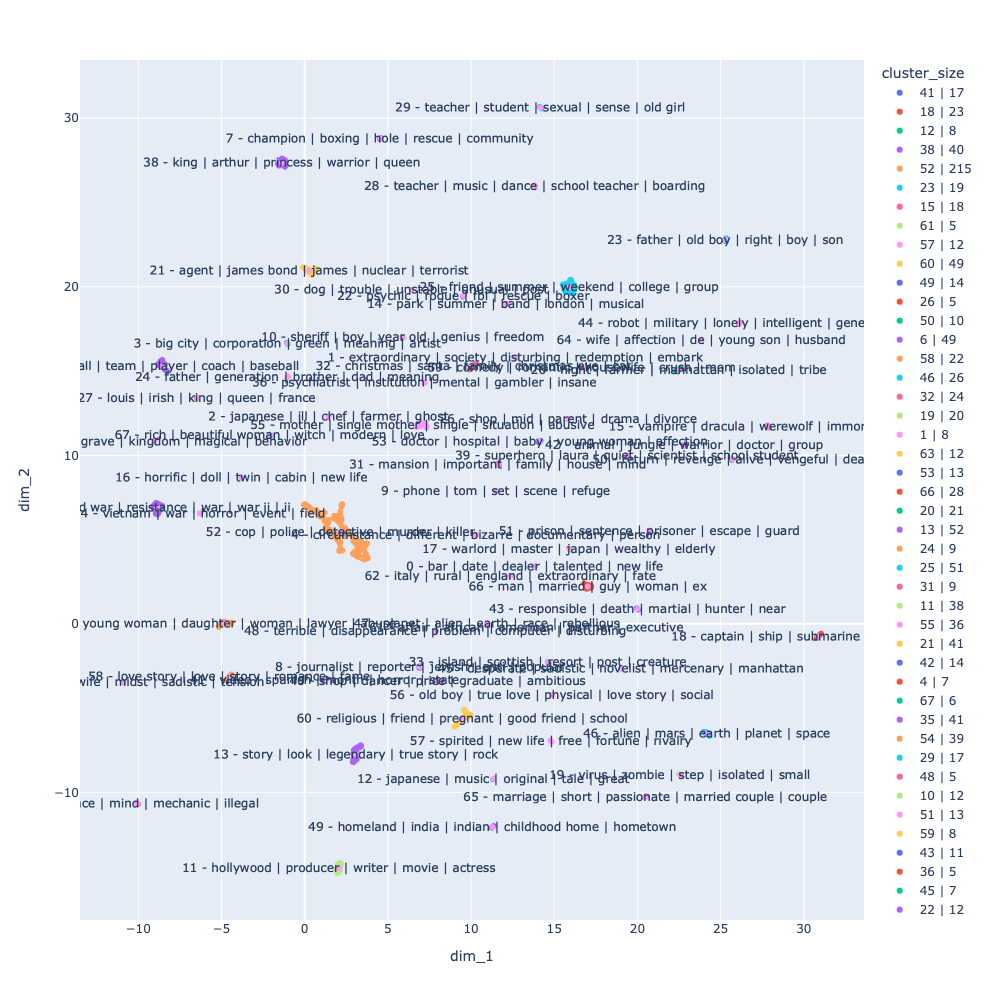

In [7]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=True, density_plot=True)
fig.show()